# Building a Custom Visualization

---
Implement a bar coloring, where the colour of the bar is based on the amount of data covered (e.g. a gradient ranging from dark blue for the distribution being certainly below this y-axis, to white if the value is certainly contained, to dark red if the value is certainly not contained as the distribution is above the axis).


In [1]:
import pandas as pd
import numpy as np

np.random.seed(12345)

df = pd.DataFrame([np.random.normal(32000,200000,3650), 
                   np.random.normal(43000,100000,3650), 
                   np.random.normal(43500,140000,3650), 
                   np.random.normal(48000,70000,3650)], 
                  index=[1992,1993,1994,1995]).T
df

,1992,1993,1994,1995
0,-8941.531897,-51896.094813,152336.932066,-69708.439062
1,127788.667612,198350.518755,192947.128056,-13289.977022
2,-71887.743011,-123518.252821,389950.263156,-30178.390991
3,-79146.060869,-129916.759685,-93006.152024,55052.181256
4,425156.114501,216119.147314,100818.575896,152883.621657
5,310681.166595,49845.883728,5529.230706,12930.835194
6,50581.575349,149135.648505,-32989.370488,63700.461932
7,88349.230566,62807.672113,223942.967178,64148.489835
8,185804.513522,23365.577348,-66721.580898,-29316.268556
9,281286.947277,-109686.264981,47826.269111,59645.677367


<IPython.core.display.Javascript object>


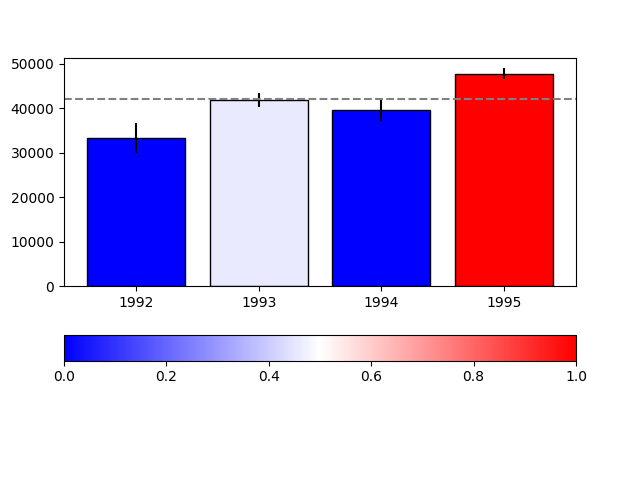

In [78]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcol
import matplotlib.cm as cm

%matplotlib notebook

user_threshold = 42000

plt.figure()
plt.gca().xaxis.set_ticks(np.arange(1992,1996,1))
plt.axhline(y=user_threshold, color='grey', ls='--')

cm1 = mcol.LinearSegmentedColormap.from_list("",["blue", "white", "red"])
norm = mcol.Normalize(vmin=0, vmax=1)
#cpick = cm.ScalarMappable(cmap=cm.RdBu_r, norm=norm)
cpick = cm.ScalarMappable(cmap=cm1, norm=norm)
cpick.set_array([])
cpick

redratio=[]
for y in range(1992,1996):
    yerr=(df[y].std())/np.sqrt(df[y].count())
    high = df[y].mean() + yerr 
    low = df[y].mean() - yerr
    redratio.append(max(min((high-user_threshold)/(high-low),1),0))

    #    if df[y].mean()+yerr < user_threshold:
#        c = 'Blue'
#    else:
#        if df[y].mean()-yerr > user_threshold:
#            c = 'Red'
#        else: 
#            c = "White"
    plt.bar(y,df[y].mean(), yerr=yerr, color=(cpick.to_rgba(redratio))[y-1992], edgecolor='black')

cbar = plt.colorbar(cpick, orientation='horizontal')

plt.subplots_adjust(left=0.1, bottom=0.2)
